## Import Modules

In [1]:
# conda install -c conda-forge imbalanced-learn

In [2]:
# !pip install imblearn --user

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import binarize

# Custom package for data preprocessing
import mytools as mt 

# Model building
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Notebook settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Pretty display of multiple functions in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# example of using the ColumnTransformer for the Abalone dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from imblearn.over_sampling import ADASYN

### File Location

In [4]:
# Data paths
import filepaths

# Set global variable
RANDOM_NUM = 123

## Load Data

In [5]:
df_churn = pd.read_csv(filepaths.processed_churn_data, sep=',')
mt.check_unique_no(df_churn, ['customer_id'])
df_churn.shape

Data has 5506 unique customer_id


(5506, 79)

In [6]:
# First 2 rows of data
df_churn.head(2)

,customer_id,gender,biological_age.group,state,region,customer_conversion,account_age.years.group,repeat_purchaser,returned_item_before,conversion_date.year_month,conversion_date,last_purchase_date,total_unique_purchase_days,total_unique_transactions,total_items_purchased,total_tax_paid,total_amt_paid,total_unique_trans_not_reversed,min_duration_btwn_purchase_days,max_duration_btwn_purchase_days,avg_duration_btwn_purchase_days,median_duration_btwn_purchase_days,time_since_last_purchase.days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags_Mens,sum.Bags_Women,sum.Books_Academic,sum.Books_Children,sum.Books_Comics,sum.Books_DIY,sum.Books_Fiction,sum.Books_Non-Fiction,sum.Clothing_Kids,sum.Clothing_Mens,sum.Clothing_Women,sum.Electronics_Audio and video,sum.Electronics_Cameras,sum.Electronics_Computers,sum.Electronics_Mobiles,sum.Electronics_Personal Appliances,sum.Footwear_Kids,sum.Footwear_Mens,sum.Footwear_Women,sum.Home and kitchen_Bath,sum.Home and kitchen_Furnishing,sum.Home and kitchen_Kitchen,sum.Home and kitchen_Tools,count.Flagship store,count.MBR,count.TeleShop,count.e-Shop,count.Bags_Mens,count.Bags_Women,count.Books_Academic,count.Books_Children,count.Books_Comics,count.Books_DIY,count.Books_Fiction,count.Books_Non-Fiction,count.Clothing_Kids,count.Clothing_Mens,count.Clothing_Women,count.Electronics_Audio and video,count.Electronics_Cameras,count.Electronics_Computers,count.Electronics_Mobiles,count.Electronics_Personal Appliances,count.Footwear_Kids,count.Footwear_Mens,count.Footwear_Women,count.Home and kitchen_Bath,count.Home and kitchen_Furnishing,count.Home and kitchen_Kitchen,count.Home and kitchen_Tools,number_of_days_late_above_median_duration_factor,churned_customer
0,266783,M,40_45,Pennsylvania,Northeast,converted,03_04,yes,yes,2011.0_9.0,2011-09-23,2013-09-02,4.00,4.00,6.00,295.89,3113.89,3.00,122.00,456.00,291.50,294.00,456.00,0.00,0.00,308.30,2805.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1845.35,0.00,1268.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.55,no
1,266784,F,22_25,California,West,converted,02_03,yes,no,2012.0_4.0,2012-04-12,2012-09-09,3.00,3.00,10.00,541.07,5694.06,3.00,17.00,814.00,321.33,133.00,814.00,442.00,0.00,4279.66,972.40,0.00,0.00,0.00,0.00,0.00,0.00,972.40,4279.66,0.00,0.00,0.00,0.00,0.00,0.00,442.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.12,yes


In [7]:
# Last 2 rows of data
df_churn.tail(2)

,customer_id,gender,biological_age.group,state,region,customer_conversion,account_age.years.group,repeat_purchaser,returned_item_before,conversion_date.year_month,conversion_date,last_purchase_date,total_unique_purchase_days,total_unique_transactions,total_items_purchased,total_tax_paid,total_amt_paid,total_unique_trans_not_reversed,min_duration_btwn_purchase_days,max_duration_btwn_purchase_days,avg_duration_btwn_purchase_days,median_duration_btwn_purchase_days,time_since_last_purchase.days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags_Mens,sum.Bags_Women,sum.Books_Academic,sum.Books_Children,sum.Books_Comics,sum.Books_DIY,sum.Books_Fiction,sum.Books_Non-Fiction,sum.Clothing_Kids,sum.Clothing_Mens,sum.Clothing_Women,sum.Electronics_Audio and video,sum.Electronics_Cameras,sum.Electronics_Computers,sum.Electronics_Mobiles,sum.Electronics_Personal Appliances,sum.Footwear_Kids,sum.Footwear_Mens,sum.Footwear_Women,sum.Home and kitchen_Bath,sum.Home and kitchen_Furnishing,sum.Home and kitchen_Kitchen,sum.Home and kitchen_Tools,count.Flagship store,count.MBR,count.TeleShop,count.e-Shop,count.Bags_Mens,count.Bags_Women,count.Books_Academic,count.Books_Children,count.Books_Comics,count.Books_DIY,count.Books_Fiction,count.Books_Non-Fiction,count.Clothing_Kids,count.Clothing_Mens,count.Clothing_Women,count.Electronics_Audio and video,count.Electronics_Cameras,count.Electronics_Computers,count.Electronics_Mobiles,count.Electronics_Personal Appliances,count.Footwear_Kids,count.Footwear_Mens,count.Footwear_Women,count.Home and kitchen_Bath,count.Home and kitchen_Furnishing,count.Home and kitchen_Kitchen,count.Home and kitchen_Tools,number_of_days_late_above_median_duration_factor,churned_customer
5504,275264,M,22_25,Pennsylvania,Northeast,converted,03_04,yes,no,2011.0_5.0,2011-05-08,2011-08-10,2.00,2.00,9.00,362.56,3815.57,2.00,94.00,1210.00,652.00,652.00,1210.00,0.00,0.00,1221.03,2594.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1221.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2594.54,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.86,no
5505,275265,M,22_25,Illinois,Midwest,converted,02_03,yes,no,2011.0_12.0,2011-12-17,2013-03-04,3.00,3.00,7.00,309.01,3252.02,3.00,9.00,638.00,360.33,434.00,638.00,2383.49,0.00,245.31,623.22,245.31,0.00,623.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2383.49,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.47,no


## Check for Missing Data

In [8]:
pd.isnull(np.nan)

True

In [9]:
df_churn.isnull().sum().tail()

count.Home and kitchen_Furnishing                   0
count.Home and kitchen_Kitchen                      0
count.Home and kitchen_Tools                        0
number_of_days_late_above_median_duration_factor    0
churned_customer                                    0
dtype: int64

In [10]:
df_churn['customer_conversion'].value_counts(dropna=False)

converted    5506
Name: customer_conversion, dtype: int64

## Check Summary Statistics

#### Descriptive statistics

In [11]:
df_churn.describe()

,customer_id,total_unique_purchase_days,total_unique_transactions,total_items_purchased,total_tax_paid,total_amt_paid,total_unique_trans_not_reversed,min_duration_btwn_purchase_days,max_duration_btwn_purchase_days,avg_duration_btwn_purchase_days,median_duration_btwn_purchase_days,time_since_last_purchase.days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags_Mens,sum.Bags_Women,sum.Books_Academic,sum.Books_Children,sum.Books_Comics,sum.Books_DIY,sum.Books_Fiction,sum.Books_Non-Fiction,sum.Clothing_Kids,sum.Clothing_Mens,sum.Clothing_Women,sum.Electronics_Audio and video,sum.Electronics_Cameras,sum.Electronics_Computers,sum.Electronics_Mobiles,sum.Electronics_Personal Appliances,sum.Footwear_Kids,sum.Footwear_Mens,sum.Footwear_Women,sum.Home and kitchen_Bath,sum.Home and kitchen_Furnishing,sum.Home and kitchen_Kitchen,sum.Home and kitchen_Tools,count.Flagship store,count.MBR,count.TeleShop,count.e-Shop,count.Bags_Mens,count.Bags_Women,count.Books_Academic,count.Books_Children,count.Books_Comics,count.Books_DIY,count.Books_Fiction,count.Books_Non-Fiction,count.Clothing_Kids,count.Clothing_Mens,count.Clothing_Women,count.Electronics_Audio and video,count.Electronics_Cameras,count.Electronics_Computers,count.Electronics_Mobiles,count.Electronics_Personal Appliances,count.Footwear_Kids,count.Footwear_Mens,count.Footwear_Women,count.Home and kitchen_Bath,count.Home and kitchen_Furnishing,count.Home and kitchen_Kitchen,count.Home and kitchen_Tools,number_of_days_late_above_median_duration_factor
count,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00,5506.00
mean,271034.04,3.79,3.79,10.25,843.97,8881.82,3.42,187.04,626.69,377.30,347.57,546.26,1776.27,1771.01,1712.93,3621.61,388.25,367.31,376.51,403.45,385.23,381.53,405.62,389.76,386.84,375.67,381.70,390.34,390.16,382.02,409.84,386.62,392.87,363.64,381.52,384.92,383.59,379.76,394.69,0.75,0.76,0.74,1.53,0.16,0.16,0.16,0.17,0.17,0.16,0.17,0.17,0.16,0.16,0.16,0.16,0.16,0.16,0.17,0.16,0.17,0.15,0.17,0.17,0.16,0.17,0.18,2.41
std,2453.21,1.83,1.84,5.89,555.06,5841.40,1.76,269.89,226.79,223.05,246.36,261.47,2668.48,2595.16,2580.76,3838.07,1268.99,1232.24,1246.62,1287.84,1234.64,1240.27,1323.02,1268.34,1278.02,1260.84,1265.88,1281.36,1276.06,1275.28,1294.58,1270.63,1272.59,1228.23,1203.20,1212.33,1229.53,1223.16,1240.47,0.86,0.86,0.85,1.22,0.40,0.40,0.39,0.41,0.41,0.40,0.41,0.41,0.41,0.40,0.40,0.40,0.40,0.40,0.41,0.40,0.41,0.39,0.41,0.41,0.40,0.41,0.42,3.10
min,266783.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,268908.25,2.00,2.00,6.00,417.06,4389.06,2.00,26.00,456.00,233.00,175.00,368.00,0.00,0.00,0.00,232.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,271024.50,4.00,4.00,9.00,752.90,7923.40,3.00,74.00,582.00,314.75,289.00,483.00,0.00,215.47,0.00,2532.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.54
75%,273171

In [12]:
df_churn.describe(include=['object'])

,gender,biological_age.group,state,region,customer_conversion,account_age.years.group,repeat_purchaser,returned_item_before,conversion_date.year_month,conversion_date,last_purchase_date,churned_customer
count,5506,5506,5506,5506,5506,5506,5506,5506,5506,5506,5506,5506
unique,2,5,6,4,1,4,2,2,46,929,938,2
top,M,25_30,Texas,South,converted,03_04,yes,no,2011.0_3.0,2011-01-30,2014-12-01,no
freq,2828,1220,1618,2164,5506,3621,4993,3780,469,24,27,3908


- High number of customers have held accounts between 3 to 4 years
- High number of customers are in the age range between 25 and 30
- High number of customers are repeat purchasers, never returned an item they bought, nor churned_customer

#### Average distribution across the two churned_customer classes

In [13]:
df_churn.groupby('churned_customer').mean()

,customer_id,total_unique_purchase_days,total_unique_transactions,total_items_purchased,total_tax_paid,total_amt_paid,total_unique_trans_not_reversed,min_duration_btwn_purchase_days,max_duration_btwn_purchase_days,avg_duration_btwn_purchase_days,median_duration_btwn_purchase_days,time_since_last_purchase.days,sum.Flagship store,sum.MBR,sum.TeleShop,sum.e-Shop,sum.Bags_Mens,sum.Bags_Women,sum.Books_Academic,sum.Books_Children,sum.Books_Comics,sum.Books_DIY,sum.Books_Fiction,sum.Books_Non-Fiction,sum.Clothing_Kids,sum.Clothing_Mens,sum.Clothing_Women,sum.Electronics_Audio and video,sum.Electronics_Cameras,sum.Electronics_Computers,sum.Electronics_Mobiles,sum.Electronics_Personal Appliances,sum.Footwear_Kids,sum.Footwear_Mens,sum.Footwear_Women,sum.Home and kitchen_Bath,sum.Home and kitchen_Furnishing,sum.Home and kitchen_Kitchen,sum.Home and kitchen_Tools,count.Flagship store,count.MBR,count.TeleShop,count.e-Shop,count.Bags_Mens,count.Bags_Women,count.Books_Academic,count.Books_Children,count.Books_Comics,count.Books_DIY,count.Books_Fiction,count.Books_Non-Fiction,count.Clothing_Kids,count.Clothing_Mens,count.Clothing_Women,count.Electronics_Audio and video,count.Electronics_Cameras,count.Electronics_Computers,count.Electronics_Mobiles,count.Electronics_Personal Appliances,count.Footwear_Kids,count.Footwear_Mens,count.Footwear_Women,count.Home and kitchen_Bath,count.Home and kitchen_Furnishing,count.Home and kitchen_Kitchen,count.Home and kitchen_Tools,number_of_days_late_above_median_duration_factor
churned_customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,271045.57,3.72,3.73,10.10,832.16,8757.51,3.36,144.84,582.25,352.52,344.59,474.62,1771.86,1784.09,1708.79,3492.78,407.84,364.86,362.50,404.63,383.27,379.38,413.10,377.32,367.60,375.44,383.57,391.51,376.46,375.64,392.42,375.66,401.54,358.48,373.83,376.31,358.42,381.84,375.88,0.74,0.76,0.74,1.49,0.16,0.16,0.15,0.17,0.17,0.16,0.17,0.16,0.16,0.16,0.16,0.16,0.16,0.15,0.17,0.16,0.17,0.15,0.17,0.16,0.16,0.17,0.17,1.49
yes,271005.87,3.94,3.95,10.60,872.86,9185.84,3.56,290.24,735.37,437.90,354.89,721.46,1787.06,1739.02,1723.07,3936.69,340.32,373.31,410.75,400.56,390.03,386.78,387.34,420.19,433.90,376.23,377.12,387.47,423.66,397.62,452.45,413.44,371.66,376.24,400.33,405.95,445.14,374.67,440.67,0.78,0.77,0.76,1.64,0.17,0.17,0.16,0.16,0.17,0.16,0.17,0.18,0.18,0.16,0.17,0.17,0.17,0.17,0.19,0.17,0.17,0.16,0.18,0.18,0.18,0.18,0.19,4.67


#### Correlation between predictors

In [14]:
# df_churn_corr = df_churn.drop(['churned_customer_customer'], axis=1)
# df_churn_corr.columns

In [15]:
# df_churn_corr.corr()|

## Establish baseline for logistic regression model

In [16]:
df_churn['churned_customer'].value_counts()

no     3908
yes    1598
Name: churned_customer, dtype: int64

In [17]:
df_churn['churned_customer'].value_counts(normalize=True)

no    0.71
yes   0.29
Name: churned_customer, dtype: float64

If a dumb model was to always predict that a patient did not churn, it will be correct 76% of the time. This 76% is the **null accuracy**

This is an **imbalanced classification problem** because of the majority occurence of the 'no' class vs the minority occurence of the 'yes' class observations.

This imbalance in the data classes can be treated in either of two ways to ensure the logistic regression algorithm learns the right patterns when it is implemented on the data. This includes:
- **resampling** the training data before modeling using techniques such as undersampling, oversampling, SMOTE (synthetic minority oversampling technique)
- using **precision and recall in the confusion matrix** to evaluate model performance.

We will use the latter.

## Preprocess Data

### Drop Some Features

In [18]:
print(list(df_churn))

['customer_id', 'gender', 'biological_age.group', 'state', 'region', 'customer_conversion', 'account_age.years.group', 'repeat_purchaser', 'returned_item_before', 'conversion_date.year_month', 'conversion_date', 'last_purchase_date', 'total_unique_purchase_days', 'total_unique_transactions', 'total_items_purchased', 'total_tax_paid', 'total_amt_paid', 'total_unique_trans_not_reversed', 'min_duration_btwn_purchase_days', 'max_duration_btwn_purchase_days', 'avg_duration_btwn_purchase_days', 'median_duration_btwn_purchase_days', 'time_since_last_purchase.days', 'sum.Flagship store', 'sum.MBR', 'sum.TeleShop', 'sum.e-Shop', 'sum.Bags_Mens', 'sum.Bags_Women', 'sum.Books_Academic', 'sum.Books_Children', 'sum.Books_Comics', 'sum.Books_DIY', 'sum.Books_Fiction', 'sum.Books_Non-Fiction', 'sum.Clothing_Kids', 'sum.Clothing_Mens', 'sum.Clothing_Women', 'sum.Electronics_Audio and video', 'sum.Electronics_Cameras', 'sum.Electronics_Computers', 'sum.Electronics_Mobiles', 'sum.Electronics_Personal Ap

In [19]:
df_churn = df_churn.drop(['customer_id','customer_conversion','conversion_date.year_month', 'conversion_date', 'last_purchase_date'], axis=1)
df_churn.shape

(5506, 74)

### Convert Data Types

In [20]:
df_churn.dtypes

gender                                               object
biological_age.group                                 object
state                                                object
region                                               object
account_age.years.group                              object
repeat_purchaser                                     object
returned_item_before                                 object
total_unique_purchase_days                          float64
total_unique_transactions                           float64
total_items_purchased                               float64
total_tax_paid                                      float64
total_amt_paid                                      float64
total_unique_trans_not_reversed                     float64
min_duration_btwn_purchase_days                     float64
max_duration_btwn_purchase_days                     float64
avg_duration_btwn_purchase_days                     float64
median_duration_btwn_purchase_days      

### Encode Data

#### Target : Identify positive class and encode target variables

- Because we are interested in predicting those who have churned_customer, our **positive class** will be 'yes' which we will encode as 1. 'no' is the **negative class** and will be encoded as 0.

In [21]:
# Encode target variables
df_churn['churned_customer'] = df_churn['churned_customer'].map({'yes':1, 'no':0})

In [22]:
# Target
df_target = df_churn['churned_customer']
df_target.shape

(5506,)

In [23]:
# Features
df_features = df_churn.drop(['churned_customer'], axis = 1)
df_features.shape

(5506, 73)

In [24]:
# Train/Test split dataframes
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target,  train_size=0.80, random_state = RANDOM_NUM) #, stratify=df_target

In [25]:
# determine categorical and numerical features
num_features = df_features.select_dtypes(include=['int64', 'float64']).columns
cat_features = df_features.select_dtypes(include=['object', 'bool']).columns

### Normalize/ Rescale Data

In [26]:
# define the data preparation for the columns 
col_transformer = ColumnTransformer(transformers = [('cat', OneHotEncoder(), cat_features), ('num', MinMaxScaler(), num_features)])

In [27]:
# transform training data
df_features_train = col_transformer.fit_transform(df_features_train)

In [28]:
# scale the test dataset
df_features_test = col_transformer.transform(df_features_test)

### Build and Evaluate Model Performance with Normalized Data and Train/Test Split

In [29]:
# fit the model
model = LogisticRegression()
model.fit(df_features_train, df_target_train)
# evaluate the model
yhat = model.predict(df_features_test)
# evaluate predictions
accuracy = accuracy_score(df_target_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

LogisticRegression()

Accuracy: 94.646


### Build and Evaluate Model with Normalized Data and Cross Validation

In [30]:
pipeline = Pipeline(steps=[('prep',col_transformer), ('m', model)])
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, df_features, df_target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 94.951 (0.804)


### Build and Evaluate Model with Normalized Data, Dimensions Reduced with SVD and Cross Validation

>1 0.710 (0.001)
>2 0.710 (0.001)
>3 0.710 (0.001)
>4 0.710 (0.001)
>5 0.710 (0.001)
>6 0.710 (0.001)
>7 0.761 (0.011)
>8 0.758 (0.012)
>9 0.758 (0.012)
>10 0.757 (0.012)
>11 0.757 (0.012)
>12 0.757 (0.012)
>13 0.756 (0.012)
>14 0.756 (0.012)
>15 0.820 (0.012)
>16 0.821 (0.012)
>17 0.820 (0.012)
>18 0.820 (0.012)
>19 0.820 (0.012)


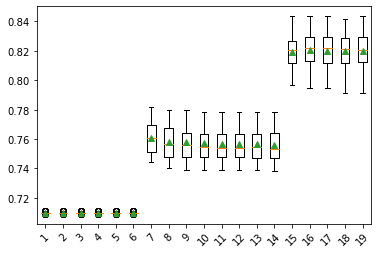

In [31]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,20):
        steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
    scores = cross_val_score(model, df_features, df_target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y =  df_features, df_target
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show();

In [32]:
# define the model
steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(df_features, df_target)
# evaluate the model
yhat = model.predict(df_features)
# evaluate predictions
accuracy = accuracy_score(df_target, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['gender', 'biological_age.group', 'state', 'region',
       'account_age.years.group', 'repeat_purchaser', 'returned_item_before'],
      dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['total_unique_purchase_days', 'total_unique_transactions',
       'total_items_purchased', 'total_tax_paid', 't...
       'count.Electronics_Personal Appliances', 'count.Footwear_Kids',
       'count.Footwear_Mens', 'count.Footwear_Women',
       'count.Home and kitchen_Bath', 'count.Home and kitchen_Furnishing',
       'count.Home and kitchen_Kitchen', 'count.Home and kitchen_Tools',
       'number_of_days_late_above_median_duration_factor'],
      dtype='object'))])),
                ('svd', TruncatedSVD(n_components=15)),
                ('m', Logis

Accuracy: 82.147


In [33]:
# define the model
steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=15)), ("pipeline", Pipeline([
                            ('over', SMOTE()), ('m', LogisticRegression())
                          ]))]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(df_features, df_target)
# evaluate the model
yhat = model.predict(df_features)
# evaluate predictions
accuracy = accuracy_score(df_target, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['gender', 'biological_age.group', 'state', 'region',
       'account_age.years.group', 'repeat_purchaser', 'returned_item_before'],
      dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['total_unique_purchase_days', 'total_unique_transactions',
       'total_items_purchased', 'total_tax_paid', 't...
       'count.Footwear_Mens', 'count.Footwear_Women',
       'count.Home and kitchen_Bath', 'count.Home and kitchen_Furnishing',
       'count.Home and kitchen_Kitchen', 'count.Home and kitchen_Tools',
       'number_of_days_late_above_median_duration_factor'],
      dtype='object'))])),
                ('svd', TruncatedSVD(n_components=15)),
                ('pipeline',
                 Pipeline(steps=[('over', SMOTE()),
                 

Accuracy: 79.223


In [34]:
# define the model
steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=15)), ("pipeline", Pipeline([
                            ('over', SMOTE()), ('m', LogisticRegression())
                          ]))]
model = Pipeline(steps=steps)
 
# evaluate a give model using cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.856


In [35]:
# define the model
steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=15)), ("pipeline", Pipeline([
                            ('over', ADASYN()), ('m', LogisticRegression())
                          ]))]
model = Pipeline(steps=steps)
 
# evaluate a give model using cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.856


In [ ]:
# define the model
steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=15)), ("pipeline", Pipeline([
                            ('over', ADASYN()), ('m', LogisticRegression())
                          ]))]
model = Pipeline(steps=steps)
 
# evaluate a give model using cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,20):
        steps = [('prep',col_transformer), ('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_NUM)
    scores = cross_val_score(model, df_features, df_target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y =  df_features, df_target
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show();

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
M

NameError: name 'M' is not defined

In [ ]:
Feature selection - Lasso and Ridge Regularization, farmerline tutorial https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/
Feature selection - RFE https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
Coefficient interpretation https://rpubs.com/OmaymaS/182726
Null accuracy vs Accuracy Paradox
Hyperparameter tuning
Cost-benefit analysis / Business impact - https://www.dataoptimal.com/churn-prediction-with-r/
Save model and deploy
Story telling, metrics, business headlines - https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b
Following

In [ ]:
sum_cols = list(df_master.columns[df_master.columns.str.startswith('sum')])
count_cols = list(df_master.columns[df_master.columns.str.startswith('count')])

#### Features : Encode categorical features as dummy variables

In [ ]:
cat_features = list(df_churn.describe(include=['object']).columns.values)
cat_features

In [ ]:
df_cat_features = df_churn[cat_features]
df_cat_features.shape
df_cat_features.head()

In [ ]:
df_cat_features_encoded = pd.get_dummies(df_cat_features, drop_first=True)#
df_cat_features_encoded.head()
df_cat_features_encoded.shape

In [ ]:
df_churn.drop(cat_features, axis=1, inplace=True)

In [ ]:
df_churn = pd.concat([df_churn, df_cat_features_encoded], axis=1).reset_index(drop=True)
df_churn.shape
df_churn.head(2)

In [ ]:
# df_churn.isnull().sum()

### Standardize Data

In [ ]:
df_unscaled_features = df_features.copy()

In [ ]:
# Not entirely useful here because we won't be able to properly interpret dummy variables
# churn_scaler = StandardScaler() # empty object

# churn_scaler.fit(df_unscaled_features) # calculates standard deviation and mean

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [ ]:
print(list(df_unscaled_features))

In [ ]:
columns_to_scale = ['number_of_unique_purchase_days', 'sum.Flagship store', 'sum.MBR', 'sum.TeleShop', 'sum.e-Shop', 'sum.Bags', 'sum.Books', 'sum.Clothing', 'sum.Electronics', 'sum.Footwear', 'sum.Home and kitchen', 'sum.Academic', 'sum.Audio and video', 'sum.Bath', 'sum.Cameras', 'sum.Children', 'sum.Comics', 'sum.Computers', 'sum.DIY', 'sum.Fiction', 'sum.Furnishing', 'sum.Kids', 'sum.Kitchen', 'sum.Mens', 'sum.Mobiles', 'sum.Non-Fiction', 'sum.Personal Appliances', 'sum.Tools', 'sum.Women']

In [ ]:
churn_scaler = CustomScaler(columns_to_scale) # empty object

In [ ]:
churn_scaler.fit(df_unscaled_features) # calculates standard deviation and mean

In [ ]:
df_scaled_features = churn_scaler.transform(df_unscaled_features) # subtracts means and divides by standard deviation
df_scaled_features
df_scaled_features.shape

### Split data to train and test to help evaluate model performance

In [ ]:
# Train/Test split dataframes
df_scaled_features_train, df_scaled_features_test, df_target_train, df_target_test = train_test_split(df_scaled_features, df_target,  train_size=0.80, random_state = 10) #, stratify=df_target

In [ ]:
print(df_scaled_features_train.shape); df_target_train.shape

In [ ]:
# df_scaled_features_train

In [ ]:
print(df_scaled_features_test.shape); df_target_test.shape

## Build logistic regression model v1

In [ ]:
# logistic regression object
logreg1 = LogisticRegression()
  
# train the model on train set
logreg1.fit(df_scaled_features_train, df_target_train.ravel())
  
predictions = logreg1.predict(df_scaled_features_test)

# print classification report
print(classification_report(df_target_test, predictions))

### Treat Imbalance in Target

In [ ]:
churn_resampler = SMOTE(random_state=2)

In [ ]:
df_scaled_features_smote_train, df_target_smote_train =  churn_resampler.fit_resample(df_scaled_features_train, df_target_train.ravel())

## Build logistic regression model v2

### Fit/ Train model

In [ ]:
# Instantiate model
logreg2 = LogisticRegression()

# C = [10, 1, .1, .001]

# for c in C:
#     logreg = LogisticRegression(penalty='l1', C=c, solver='liblinear') 

In [ ]:
# Fit model
logreg2.fit(df_scaled_features_smote_train, df_target_smote_train.ravel())

In [ ]:
# print('C:', c)
# print('Coefficient of each feature:', logreg.coef_)
# print('Training accuracy:', logreg.score(df_scaled_features_train, df_target_train))
# print('Test accuracy:', logreg.score(df_scaled_features_test, df_target_test))
# print('')

### Make class predictions with model

In [ ]:
class_prediction_list = logreg2.predict(df_scaled_features_test)
class_prediction_list[0:10] 

## Evaluate model performance

### 0. Training accuracy

In [ ]:
logreg2.score(df_scaled_features_smote_train, df_target_smote_train.ravel()) #this is comparing the **target predictions** made on the scaled, balanced features used for training and the actual target values of the scaled, balanced features used for training the model

In [ ]:
# manual calculation
model_outputs = logreg2.predict(df_scaled_features_smote_train)
model_outputs

In [ ]:
df_target_smote_train.ravel()

In [ ]:
model_outputs == df_target_smote_train.ravel()

In [ ]:
np.sum(model_outputs == df_target_smote_train.ravel())

In [ ]:
model_outputs.shape[0]

In [ ]:
np.sum(model_outputs == df_target_smote_train.ravel()) / model_outputs.shape[0]

- The **training accuracy** is 78% which is higher than the **null accuracy**

### 1. Confusion matrix (Test accuracy)

#### Confusion matrix at threshold of 0.5

In [ ]:
pd.crosstab(df_target_test, class_prediction_list, rownames=['Actually churned_customer'], colnames=['Predicted to churn'], margins=True) #confusion matrix

In [ ]:
print(classification_report(df_target_test, class_prediction_list))  #({True:1, False:0})

In [ ]:
# Calculating test accuracy alone
logreg2.score(df_scaled_features_test, df_target_test.ravel()) 

- The test accuracy score of 0.73 means that based on data that the model has not seen before, in 73% of the cases the model will predict correctly that the customer is likely to churn

- The **(test) accuracy score (0.73) or 73%** is lower than the **training accuracy** score. The training accuracy score is higher because the trained model is used to make predictions on data used to train the model and so the model is overfitted to the data. 
- The test accuracy is always lower (usually 10-20%) than the train accuracy by definition. If the test accuracy is a higher number than the train accuracy then it might be wrong 

- The **accuracy score (0.73)** can't be trusted as this is based on when the prediction errors have equal importance. The **f1-score (0.55)** is a better metric to consider here because the data was initially imbalanced and by the business context, some prediction errors are more costly than others. 

- If our model tells us that 100 customers will churn, 46 will actually churn (precision of 0.46 = 181/392) but there are actually 181 customers who actually churned_customer (recall 0.68 = 181/268)

- If the model fails to correctly predict that a customer is likely to churn, it is more costly than the converse because that customer will not be included in the customer segment that is targeted during a retention campaign. As a result, if the customer eventually churns, it will be a loss on the return on marketing  investment. So we want to avoid this type of error called a **False Negative or Type II error**. 
- It is better in this situation for our model to have a **higher sensitivity value** than specificity because false positives (non-churn cases that are predicted as possible churn cases) are more acceptable than false negatives (churn cases that are not detected).
- For this reason we want to **maximize the recall score which will minimize the false negatives**. 
- The recall score value of 0.68 is quite low. Let's understand why?

##### Visualize probability predictions that are classified into class predictions, yes (1) or no (0) at a threshold of 0.5

In [ ]:
prob_prediction_list = logreg2.predict_proba(df_scaled_features_test)
prob_prediction_list[0:10] #left column represents probability of falling into class 0 and right column represents probability of falling into class 1

In [ ]:
# Comparing predicted probability vs predicted class at 0.5 threshold
list(zip(prob_prediction_list[0:10, 1], class_prediction_list[1:10])) #predicted probabilities > 0.5 are classified as yes (1) and those < 0.5 are classified as no (0)

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list[:,1], bins=8)
plt.xlim(0, 1)
plt.title('Probability predictions of having churned_customer')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show();

- About 25% of observations have probability <0.1
- Small number of observations with probability > 0.5
- This is below the threshold of 0.5
- Most would be predicted "no churn" in this case

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list[:,1], label='prediction')
plt.hist(df_target_test, label='test')
plt.xlim(0, 1)
plt.title('Class Predictions vs. Probability Predictions of having churned_customer')
plt.xlabel('Test data vs. predicted probability')
plt.ylabel('Frequency')
plt.legend()
plt.show();

- For this reason, the model will make more class predictions of not likely to churn (class no). 
- For this reason, we must **adjust the threshold for probability from 0.5 to 0.1** so that the classes the model predicts based on the probabilities, is similar to the class of the actual test data.

#### Adjusting classification threshold

In [ ]:
prob_prediction_list_adj = binarize(prob_prediction_list, 0.2)

In [ ]:
prob_prediction_list[0:10,1]
prob_prediction_list_adj[0:10,1]

In [ ]:
pd.crosstab(df_target_test, prob_prediction_list_adj[:,1], rownames=['Actually churned_customer'], colnames=['Predicted to churn'], margins=True) #confusion matrix

In [ ]:
print(classification_report(df_target_test, prob_prediction_list_adj[:,1]))

- Initially we were able to correctly classify 181 churn cases at a threshold of 0.5 with a recall score of 0.68. Now, when we lowered the threshold to 0.1, the model correctly classified more churn cases (259) with an increased recall score of 0.97

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list_adj[:,1], bins=8)
plt.xlim(0, 1)
plt.title('Probability predictions of having churned_customer')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show();

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [7,7]

plt.hist(prob_prediction_list_adj[:,1], label='prediction')
plt.hist(df_target_test, label='test')
plt.xlim(0, 1)
plt.title('Class Predictions vs. Probability Predictions of having churned_customer')
plt.xlabel('Test data vs. predicted probability')
plt.ylabel('Frequency')
plt.legend()
plt.show();

- It is possible to see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold. This is done by using AUROC

### 2. AUROC (Area Under the Receiver Operating Characteristic) Curve (Test accuracy)

In [ ]:
fpr, tpr, thresholds = roc_curve(df_target_test, class_prediction_list) 
roc_auc = roc_auc_score(df_target_test, prob_prediction_list[:,1])
roc_auc

In [ ]:
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (1-specificity)')
plt.show();

In [ ]:
# calculate cross-validated AUC
cross_val_score(logreg2, df_features, df_target, cv=10, scoring='roc_auc').mean()

## Final logistic regression model

### Extract logistic regression model

- The logistic regression model is made up of the intercept and the coefficients.
- The coefficients we are predicting when using a logistic regression algorithm are called **log odds**
- Logistic regression algorithms are linear functions that predict log odds which are later transformed into 0 and 1s
- The coeffiecients right now in the summary table below are log odds

In [ ]:
feature_names = df_unscaled_features.columns.values
feature_names

In [ ]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_names)
summary_table['Coefficient'] = np.transpose(logreg2.coef_) # also known as weights
summary_table.head()

In [ ]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', logreg2.intercept_[0]] # also known as bias
summary_table = summary_table.sort_index()
summary_table.head()

In [ ]:
# coeff = list(logreg.coef_[0])
# labels = list(df_scaled_features_train.columns)
# intercept = list(logreg.intercept_)[0]
# list(zip(labels, coeff))

### Interpret model coefficients

- Intercept is also known as bias

- Coefficients are also known as weights

- The closer the weight is to 0, the smaller the weight. The further the weight from 0 (no matter positive or negative), the bigger the weight of the feature. This **ONLY HOLDS TRUE FOR MODELS WHERE ALL FEATURES ARE OF THE SAME SCALE** 

- When the coefficients are standardized it means their variance is of the same scale ie 1 so we can determine the more important features by how big the weight or coefficient is. For the ease of interpretation and other reasons, you would want the standardize the features when doing machine learning.

- The logistic regression coefficients are log odds.

- However, taking the exponential of the log odds results in odds ratios (which enable us interpret the coefficients)

In [ ]:
summary_table['Odds_ratio'] = np.exp(summary_table['Coefficient'])

In [ ]:
summary_table.head()

In [ ]:
summary_table = summary_table.sort_values(['Odds_ratio'], ascending=False)
summary_table

- A feature is not particularly important if it's:

    -- **coefficient/ weight/ log odds is around 0** (log odds of 0 means no matter the feature value we will multiply it by the weight/ coefficient/ log odds of 0 which will result in 0 in the model)
    
    -- **odds ratio is around 0**

- **Interpretation:**
    
    For a 1 unit **change* in the **standardized feature**, the **odds increase by a multiple equals to the odds ratio**
    
    **This means that if the odds ratio is 1 the odds do not change at all**
    
    odds x odds ratio = new odds (a unit change)
        eg if odds is 5:1 and odds ratio is 2, then new odds is 10:1
        eg if odds is 5:1 and odds ratio is 0.2, then new odds is 1:1
        eg if odds is 5:1 and odds ratio is 1, then new odds is 5:1

- For particular use case, if coefficients of any of the features is around 0 (meaning the odds ratio is around 1), then in interpreting it, I will say that given all features, those features are the ones that seem not to make a difference in predicting if a customer will churn

In [ ]:
df_churn_raw['account_age.years.group'].value_counts(dropna=False)

In [ ]:
df_churn_raw['biological_age.group'].value_counts(dropna=False)

### Feature importance

The further away a coefficient is from 0, the bigger its importance

In [ ]:
importance_table = summary_table.copy()

In [ ]:
importance_table.head(2)

In [ ]:
importance_table = importance_table.set_index(['Feature Name'])
importance_table = importance_table.drop(index='intercept')
importance_table = importance_table.reset_index()
importance_table.head(2)

In [ ]:
importance_table['Positive'] = importance_table['Coefficient'] > 0
importance_table.set_index('Feature Name', inplace=True)
importance_table['Coefficient'].plot(kind='barh', figsize=(11, 6),color = importance_table['Positive'].map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
- For one standardized unit or one standard deviation **increase** in the total amount spent on personal appliances it is 1 times likely that a customer will churn

In [ ]:
- ML Engineers often prefer models with high accuracy so they standardize the features which allow ML models optimize well
- Econometricians and statisticians prefer less accurate but more interpretable models that are easy to interpret because they care about underlying phenomena in different situations


## Further Analysis

- Whale curve, retention curve, power user - SFL
- Preprocessing data - PCA https://www.researchgate.net/post/Can-we-do-PCA-before-logistic-regression
https://wiki.pathmind.com/eigenvector, farmerline tutorial
- Applying NearMiss Algorithm https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
- Cross-validation (model selection and feature selection)
- Algorithm - Survival analysis https://square.github.io/pysurvival/tutorials/churn.html
- Algorithm - Quantile Regression
- Algorithm - Transition Matrix
- Feature selection - Lasso and Ridge Regularization, farmerline tutorial
https://chrisalbon.com/machine_learning/logistic_regression/logistic_regression_with_l1_regularization/
- Feature selection - RFE https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- Coefficient interpretation https://rpubs.com/OmaymaS/182726
- Null accuracy vs Accuracy Paradox
- Hyperparameter tuning 
- Cost-benefit analysis / Business impact - https://www.dataoptimal.com/churn-prediction-with-r/
- Save model and deploy 
- Story telling, metrics, business headlines - https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b

### Useful Resources

- Dummy variables https://www.quora.com/How-and-why-having-the-same-number-of-dummy-variables-as-categories-is-problematic-in-linear-regression-Dummy-variable-trap-Im-looking-for-a-purely-mathematical-not-intuitive-explanation-Also-please-avoid-using-the/answer/Iliya-Valchanov?share=9494e990&srid=uX7Kg
- Implication of error in prediction https://www.sciencedirect.com/science/article/pii/S0020025519312022
- Model Evaluation - https://www.ritchieng.com/machine-learning-evaluate-classification-model/
- Redefining churn tag - https://www.diva-portal.org/smash/get/diva2:1439342/FULLTEXT01.pdf
https://github.com/jsaikmr/Telecom-Churn-Prediction
https://core.ac.uk/download/pdf/83461632.pdf (churn event shift pg 68)